# Réchauffement climatique et flux touristiques en France sur les années 2010
Manon Chevallier, Sara Chikhi, Inza Ouada Soro

# Table des matières
* [1. Import des données](#chapter1)
    * [1.1. Données climatiques](#section_1_1)
    * [1.2. Données touristiques](#section_1_2)
    * [1.3. Jointure](#section_1_3)
* [2. Statistiques descriptives](#chapter2)
    * [2.1. Statistiques sur le climat](#section_2_1)
        * [2.1.1. Variabilité climatique sur le territoire](#sub_section_2_1_1)
        * [2.1.2. Evolution dans le temps](#sub_section_2_1_2)
    * [2.2. Statistiques sur le tourisme](#section_2_1)
        * [2.2.1. Répartition du tourisme sur le territoire](#sub_section_2_2_1)
        * [2.2.2. Evolution des fréquentations touristiques](#sub_section_2_2_2)
    * [2.3. Corrélations](#section_2_1)
* [3. Modélisation](#chapter3)
    * [Présentation du modèle](#section_3_1)
    * [Résultats](#section_3_2)
* [4. Conclusion](#chapter4)


## 1. Import des données <a class="anchor" id="chapter1"></a>

In [77]:
import time
t0 = time.perf_counter()

In [78]:
import os
from IPython.display import clear_output
print(os.getcwd())

/home/onyxia/work/Project


Nous utilisons des données climatiques issues de météo france et des données sur les fréquentations touristiques issues d'une enquête mensuelle auprès des établissements touristiques. Ces deux sources de données sont importées à partir d'internet. Les codes permettant d'importer ces données se trouvent dans le dossier src/import_data. 

In [ ]:
# temps approximatif : 52s
from src import import_data
%run src/import_data/api_donnees_climat.py
%run src/import_data/api_donnees_tourisme.py

Fichier climat sauvegardé dans : /home/onyxia/work/Project/Data/data_climat.csv
Fichier tourisme sauvegardé dans : /home/onyxia/work/Project/Data/data_tourisme.csv
Fichier tourisme sauvegardé dans : /home/onyxia/work/Project/Data/data_tourisme2.csv


Ce dossier comporte deux scripts (api_donnees_climat et api_donnees_tourisme) qui chacun importent les données et les retraitent légèrement pour qu'elles soient cohérentes entre elles. En particulier, il faut qu'elles soient toutes deux au niveau départemental, annuel et mensuel. Chaque ligne de notre table de données correspondra donc à un département x une année x un mois. Nous produisons également une troisième base (data_tourisme2) comprenant l'origine des touristes, que nous traiterons plus tard.

### 1.1. Données climatiques <a id="section_1_1"></a>

On importe les données climatiques et on analyse les valeurs manquantes.


In [79]:
import pandas

data_1 = pandas.read_csv("./Data/data_climat.csv")
data_1["DEP"] = data_1["DEP"].astype(str).str.zfill(2)

null_data = data_1[data_1.isnull().any(axis=1)]
print(null_data)

nul = data_1[data_1['TM'].isnull()]
print(nul.DEP.unique())
print(nul.AAAA.unique())
print(nul.MM.unique())

       AAAA  MM         TM         TX          RR        UMM       FFM  \
23     2012  12   3.378261   6.647826  195.681395  88.444444  1.916667   
24     2013   1   1.321739   4.513043  113.476744  90.555556  1.550000   
25     2013   2  -0.122727   3.343478  103.033333  85.625000  1.983333   
26     2013   3   5.427273   9.547826   98.435714  79.125000  1.933333   
27     2013   4  10.018182  14.960870  134.383333  76.000000  2.150000   
...     ...  ..        ...        ...         ...        ...       ...   
13387  2022   8  23.600000  30.050000   34.200000        NaN       NaN   
13388  2022   9  17.800000  22.700000   47.250000        NaN       NaN   
13389  2022  10  16.450000  20.750000   69.850000        NaN       NaN   
13390  2022  11  10.250000  13.250000   48.750000        NaN       NaN   
13391  2022  12   5.650000   7.850000   55.450000        NaN       NaN   

           TXMIN    NBJTX0  NBJTX25  NBJTX30  NBJTX35   NBJNEIG  NBJSOLNG DEP  \
23     -0.495652  2.000000    

### 1.2. Données touristiques <a id="section_1_2"></a>

On importe les données touristiques et on analyse les valeurs manquantes.

In [80]:
data_2 = pandas.read_csv("./Data/data_tourisme.csv")
data_2["DEP"] = data_2["DEP"].astype(str).str.zfill(2)

null_data = data_2[data_2.isnull().any(axis=1)]
print(null_data)


Empty DataFrame
Columns: [AAAA, MM, DEP, DEP_NOM, OBS_VALUE_CORR]
Index: []


On va faire la même chose avec data_tourisme2 pour prendre en compte l'origine des touristes.

In [81]:
data_3 = pandas.read_csv("./Data/data_tourisme2.csv")
data_3["DEP"] = data_3["DEP"].astype(str).str.zfill(2)

null_data = data_3[data_3.isnull().any(axis=1)]
print(null_data)

Empty DataFrame
Columns: [AAAA, MM, DEP, DEP_NOM, TOUR_RESID, OBS_VALUE_CORR]
Index: []


### 1.3. Jointure <a id="section_1_2"></a>

On utilise une fonction de jointure écrite dans src/package_project/preparation_data.
On vérifie de nouveau qu'il n'existe pas de valeurs manquantes sur nos indicateurs d'intérêt ; cela peut arriver si tous les départements ou toutes les années ne sont pas présents dans les deux tables par exemple.

In [82]:
from src import package_project as pp

df = pp.preparation_data.merge_data(data_1, data_2)

nul_data1 = df[df['TX'].isnull()]
nul_data2 = df[df['OBS_VALUE_CORR'].isnull()]

print("Valeurs manquantes de température dans les données finales :")
print(nul_data1.DEP.unique())
print(nul_data1.AAAA.unique())
print(nul_data1.MM.unique())
df.to_csv("base.csv")

print("Valeurs manquantes d'arrivées dans les données finales :")
print(nul_data2.DEP.unique())
print(nul_data2.AAAA.unique())
print(nul_data2.MM.unique())

Valeurs manquantes de température dans les données finales :
['92']
[2019]
[ 3  4  5  6  7  8  9 10 11]
Valeurs manquantes d'arrivées dans les données finales :
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43'
 '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57'
 '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71'
 '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85'
 '86' '87' '88' '89' '90' '91' '92' '93' '94' '95' '2A' '2B']
[2020 2021]
[ 1  2  3  4  5  6 11 12]


On observe que les arrivées touristiques sont manquantes pour la période du covid. On va donc exclure les années concernées pour ne pas biaiser les résultats.

In [83]:
import pandas
df.to_csv("base.csv")


## 2. Statistiques descriptives <a id="chapter_2"></a>

La plupart des statistiques descriptives seront présentées sous forme de carte.



In [84]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

### 2.1. Statistiques sur le climat <a id="section_2_1"></a>


#### 2.1.1. Variabilité climatique sur le territoire <a id="section_2_1_1"></a>

La France est un pays avec une grande variabilité climatique sur le territoire

In [85]:
# parametres
mois_ete = [6, 7, 8, 9]
mois_hiver = [1,2,3,12]
toutes_annees = [i for i in range(2011, 2023)]


Il est important d'avoir installer cartiflette pour faire apparaître la cellule suivante: python -m pip install cartiflette

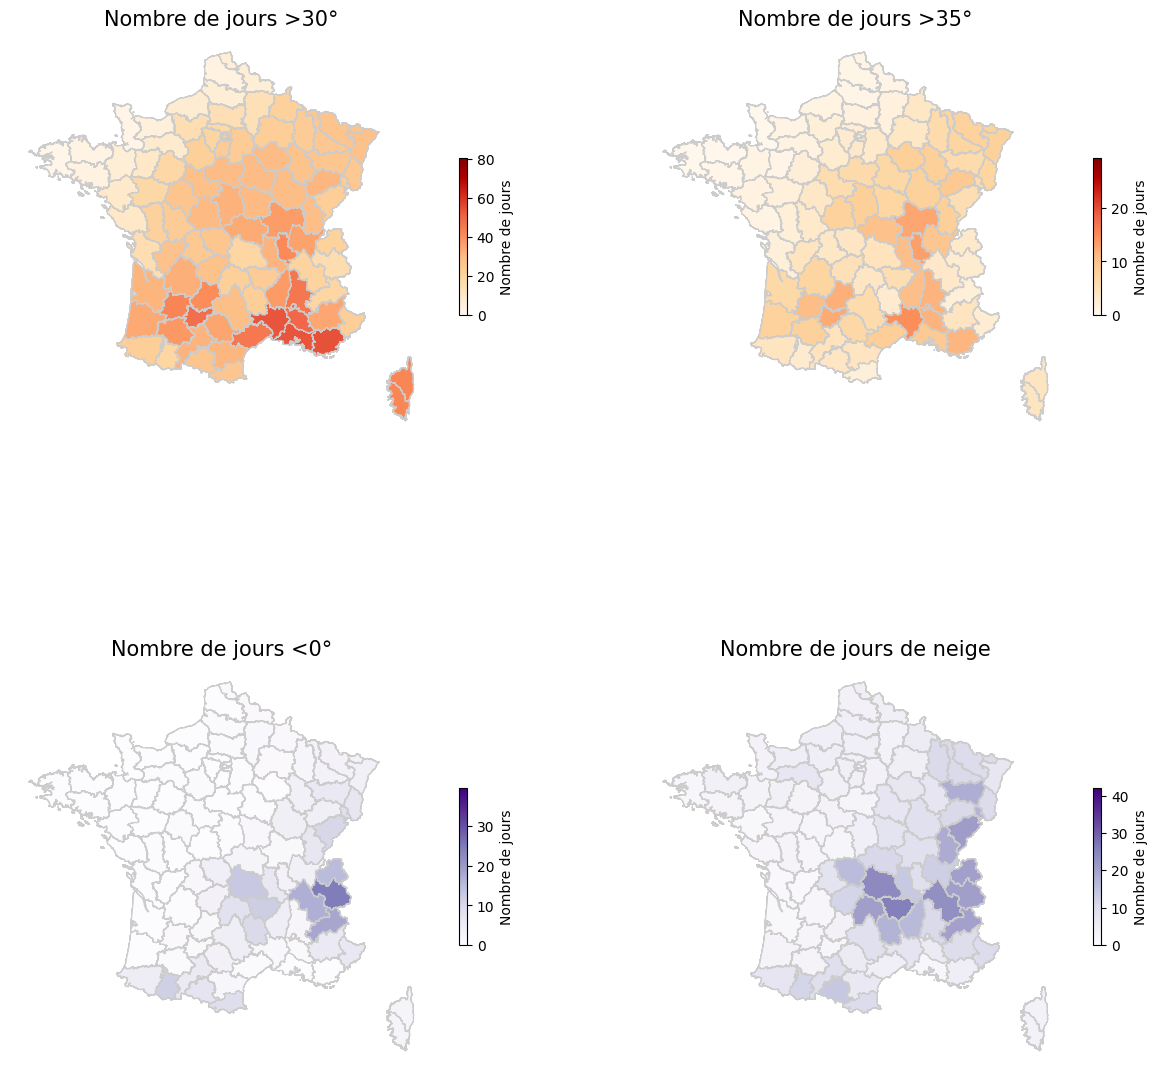

In [86]:
# TEMPS APPROXIMATIF : 40sec
from src.package_project import cartes, indicateurs_climat
# construction des cartes 

fig, ax = plt.subplots(2,2, figsize=(15, 15))

# été : nombre de jours à plus de 30 degrés et 35 degrés  
cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_climat.nbj_par_an(df, toutes_annees, mois_ete, "NBJTX30")),
            toutes_annees,
            mois_ete,
            "NBJTX30",
            "Nombre de jours >30°",
            ax[0,0],
            evolution = False)

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_climat.nbj_par_an(df, toutes_annees, mois_ete, "NBJTX35")),
            toutes_annees,
            mois_ete,
            "NBJTX35",
            "Nombre de jours >35°",
            ax[0,1],
            evolution = False)

# # hiver : nombre de jours à moins de 0° ou de neige  

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_climat.nbj_par_an(df, toutes_annees, mois_hiver, "NBJTX0")),
            toutes_annees,
            mois_hiver,
            "NBJTX0",
            "Nombre de jours <0°",
            ax[1,0],
            evolution = False)

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_climat.nbj_par_an(df, toutes_annees, mois_hiver, "NBJNEIG")),
            toutes_annees,
            mois_hiver,
            "NBJNEIG",
            "Nombre de jours de neige",
            ax[1,1],
            evolution = False)



#### 2.1.2. Evolution dans le temps <a id="section_2_1_2"></a>

On s'intéresse maintenant à l'évolution du climat dans le temps. 

In [87]:
from src.package_project.Carte_dyn import gif
from IPython.display import display, HTML

gif("hiver")
gif("été")

html = """
<div style="display:flex;">
    <img src="cart_pour_les hiver.gif" style="width:500px;"/>
    <img src="cart_pour_les été.gif" style="width:500px;"/>
</div>
"""

display(HTML(html))

In [88]:
t1 = time.perf_counter()
print(f"Temps d'affichage : {t1 - t0:.3f}s")

Temps d'affichage : 120.222s


Ces cartes dynamiques nous permettent de constater que s'il y a une tendance au réchauffement entre 2011 et 2022 (en particulier l'été), il y a une certaine variabilité selon les années. 

Intéressons nous aux évènements extrèmes (forte chaleur ou températures basses). Pour lisser les variations annuelles, on s'intéresse à l'évolution de la moyenne du nombre annuel de jours extremes, entre avant 2015 (inclus) et après 2015 (non inclus.)

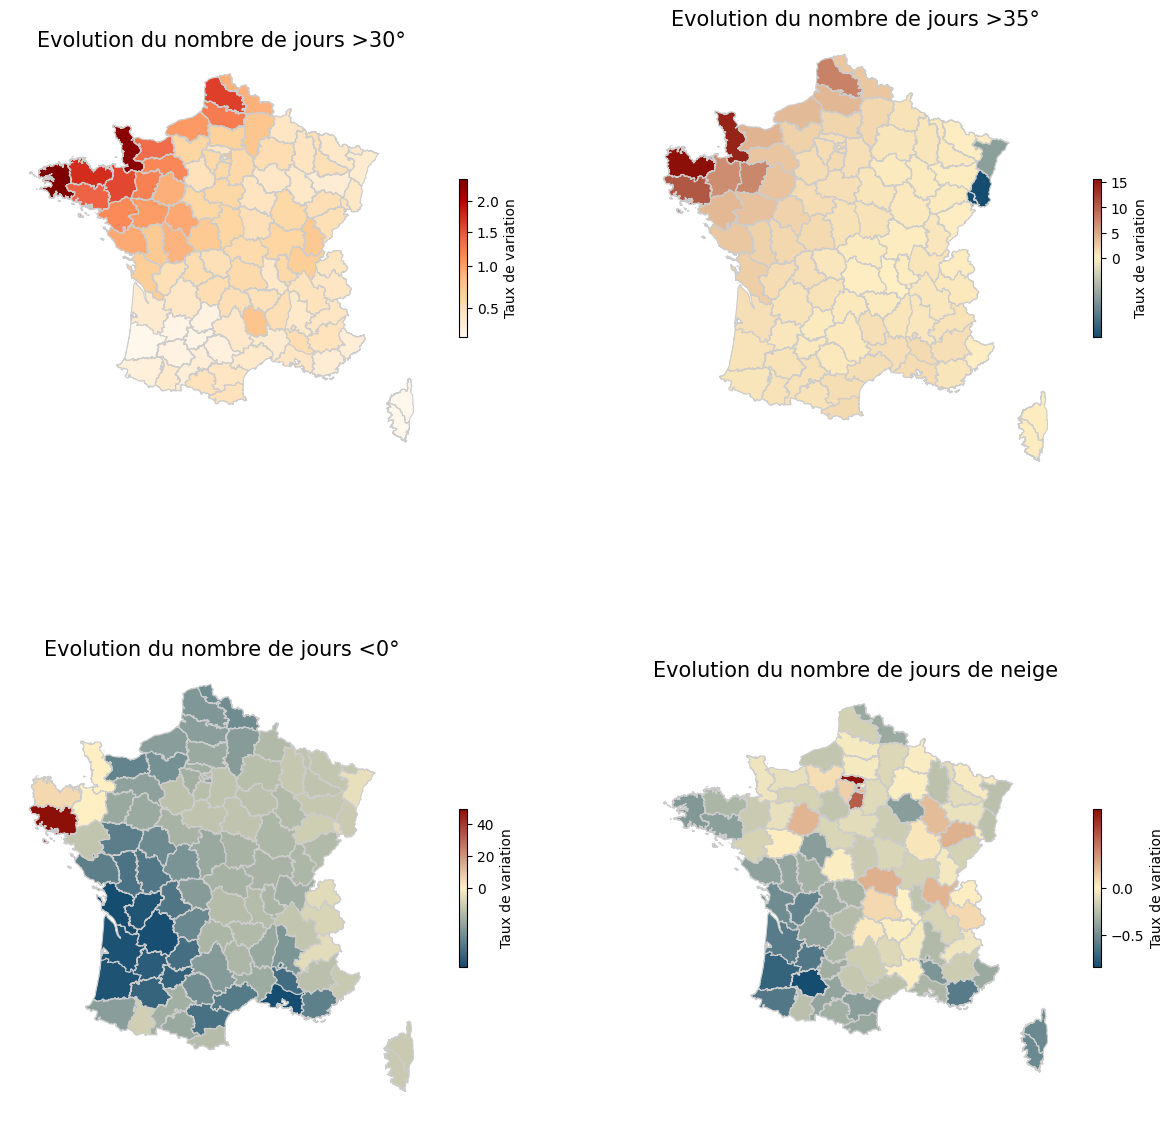

In [89]:
# évolution des évènements extremes 

fig, ax = plt.subplots(2,2, figsize=(15, 15))

# été : nombre de jours à plus de 30 degrés et 35 degrés  

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_climat.nbj_evol_2015(df, "été", "NBJTX30")),
            toutes_annees,
            mois_ete,
            "NBJTX30",
            "Evolution du nombre de jours >30°",
            ax[0,0],
            evolution = True)

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_climat.nbj_evol_2015(df, "été", "NBJTX35")),
            toutes_annees,
            mois_ete,
            "NBJTX35",
            "Evolution du nombre de jours >35°",
            ax[0,1],
            evolution = True)

# # hiver : nombre de jours à moins de 0° ou de neige  

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_climat.nbj_evol_2015(df, "hiver", "NBJTX0")),
            toutes_annees,
            mois_hiver,
            "NBJTX0",
            "Evolution du nombre de jours <0°",
            ax[1,0],
            evolution = True)

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_climat.nbj_evol_2015(df, "hiver", "NBJNEIG")),
            toutes_annees,
            mois_hiver,
            "NBJNEIG",
            "Evolution du nombre de jours de neige",
            ax[1,1],
            evolution = True)

### 2.2. Statistiques sur le tourisme <a id="section_2_2"></a>

#### 2.2.1. Répartition du tourisme sur le territoire <a id="section_2_2_1"></a>

Intéressons-nous à la répartition du tourisme sur le territoire français. 

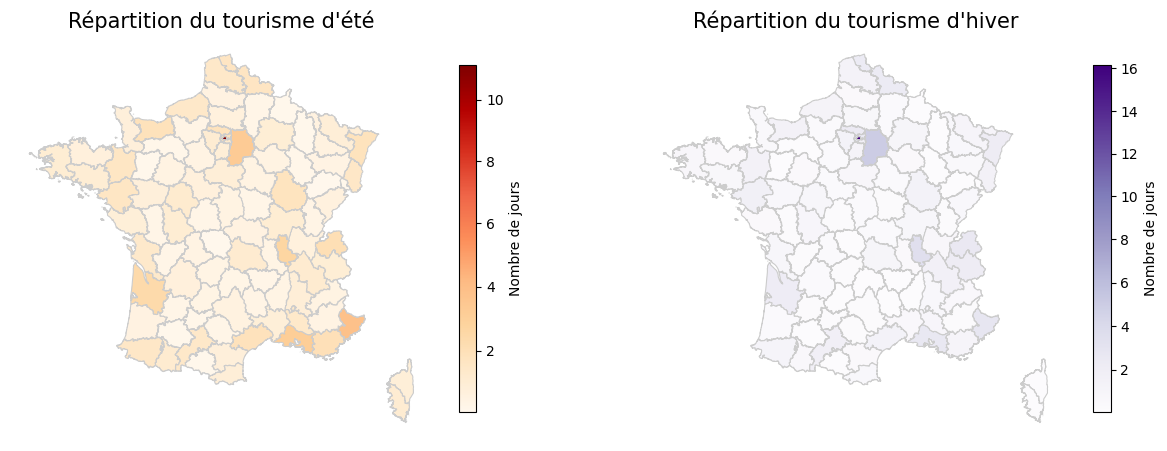

In [90]:
from src.package_project import indicateurs_tourisme

mois_hiver = [1,2,3,12]
fig, ax = plt.subplots(1,2, figsize=(15, 15))

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_tourisme.repartition_arrivees(df, toutes_annees, mois_ete, ["DEP"])),
            toutes_annees,
            mois_ete,
            "part_tourisme",
            "Répartition du tourisme d'été",
            ax[0],
            evolution = False)

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_tourisme.repartition_arrivees(df, toutes_annees, mois_hiver, ["DEP"])),
            toutes_annees,
            mois_hiver,
            "part_tourisme",
            "Répartition du tourisme d'hiver",
            ax[1],
            evolution = False)



Paris absorbe une grande part du tourisme d'été ou d'hiver. Pour avoir une meilleure visibilité du tourisme non-parisien, on exclut Paris. 

In [56]:
# A FAIRE

Nous observons que le tourisme est plus fort sur le littoral en été. 

La répartition reste néanmoins relativement proche. Une hypothèse pouvant l'expliquer est le fait qu'une partie du tourisme serait en réalité des déplacements non-touristiques (fréquentation d'un hôtel pour raison professionnelle par exemple). Dans ce cas, la répartition touristique est fortement influencée par l'activité économique des départements.

Si cette hypothèse est vérifiée, il est probable que les données donnent une corrélation assez faible entre fréquentation touristique et évolution du climat, a minima sur les départements non côtiers ou montagneux.

#### 2.2.2. Evolution des fréquentations touristiques <a id="section_2_2_2"></a>


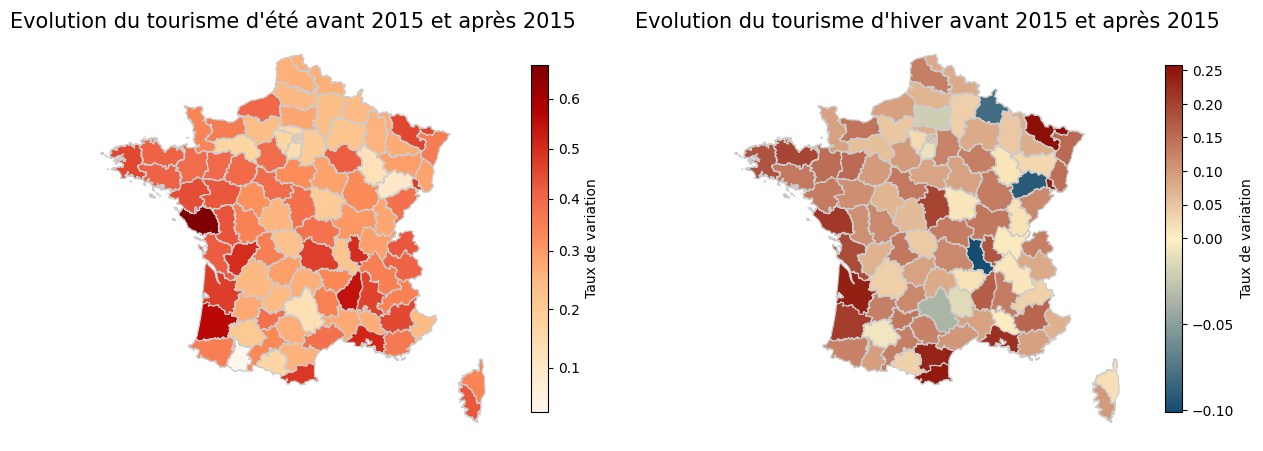

In [91]:
fig, ax = plt.subplots(1,2, figsize=(15, 15))

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_tourisme.evol_arrivees(df, mois_ete)),
            toutes_annees,
            mois_ete,
            "evol_2015",
            "Evolution du tourisme d'été avant 2015 et après 2015",
            ax[0],
            evolution = True)

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_tourisme.evol_arrivees(df, mois_hiver)),
            toutes_annees,
            mois_hiver,
            "evol_2015",
            "Evolution du tourisme d'hiver avant 2015 et après 2015",
            ax[1],
            evolution = True)

### 2.3. Corrélations <a id="section_2_3"></a>

#### 2.3.1. Corrélation climat - nombre d'arrivées (tous touristes confondus) <a id="section_2_3_1"></a>

Nous allons calculer le coefficient de corrélation global avant de s'intéresser aux coefficients de corrélation par département et par saison.

In [92]:
col_arrivees = "OBS_VALUE_CORR"
col_temp = "TX"

base_clean = df.dropna(subset=[col_arrivees, col_temp]).copy()

corr_global = base_clean[col_arrivees].corr(base_clean[col_temp], method="pearson")
print("Corrélation globale arrivées / TX :", corr_global)

Corrélation globale arrivées / TX : 0.13023927956295134


Nous calculons le coefficient de corrélation linéaire de Pearson entre le nombre d'arrivée touristiques (OBS_VALUE_CORR) et la température maximale moyenne mensuelle (TX) sur l'ensemble des départements et des périodes. 
Le coefficient de corrélation globale est 0.13, ce qui traduit un lien positif mais faible entre les deux variables : les hausses de températures s'accompagnent en moyenne d'une légère hausse des arrivées, sans que le climat ne soit le déterminant principal des flux. 

Nous qualifions de forte une corrélation lorsque |r|≥0.5 et nous affichons uniquement les départements présentant une corrélation fortement positive (r≥0.5) ou fortement négative (r≤−0,5).

Toutefois, cet indicateur reste limité : il repose sur les températures de l’année N, alors que les touristes choisissent en général leur destination plusieurs mois à l’avance, en se basant plutôt sur les conditions observées des années précédentes.
Dans cette optique, nous construisons deux nouveaux indicateurs climatiques : un indice de chaleur en N-1 et un indice de froid en N-1, afin d’analyser plus précisément la corrélation entre le climat de l'année N-1 et les arrivées de touristes en année N.

In [93]:
# Par Département
corr_par_dep = (
    base_clean
    .groupby("DEP")[[col_arrivees, col_temp]] 
    .apply(lambda g: g[col_arrivees].corr(g[col_temp], method="pearson"))
    .reset_index(name="corr_arrivees_TX")
)

dep_corr_forte_pos = corr_par_dep[corr_par_dep["corr_arrivees_TX"] >= 0.75]
liste_dep_forte_positive = corr_par_dep.loc[corr_par_dep["corr_arrivees_TX"] >= 0.75, "DEP"].tolist()
dep_corr_forte_neg = corr_par_dep[corr_par_dep["corr_arrivees_TX"] <= -0.5]

print("Départements à corrélation fortement POSITIVE :")
print(dep_corr_forte_pos)
print(liste_dep_forte_positive)

print("\nDépartements à corrélation fortement NÉGATIVE :")
print(dep_corr_forte_neg)

Départements à corrélation fortement POSITIVE :
   DEP  corr_arrivees_TX
2   03          0.882257
3   04          0.916236
5   06          0.878120
6   07          0.931762
7   08          0.787799
..  ..               ...
83  83          0.967116
84  84          0.925867
85  85          0.897433
87  87          0.868016
89  89          0.916854

[68 rows x 2 columns]
['03', '04', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23', '24', '25', '26', '27', '28', '29', '2A', '2B', '30', '32', '33', '34', '35', '36', '37', '39', '40', '41', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '55', '56', '58', '61', '62', '63', '64', '65', '66', '71', '72', '76', '79', '80', '81', '82', '83', '84', '85', '87', '89']

Départements à corrélation fortement NÉGATIVE :
Empty DataFrame
Columns: [DEP, corr_arrivees_TX]
Index: []


In [94]:
# Par Département
corr_par_dep = (
    base_clean
    .groupby("DEP")[[col_arrivees, col_temp]] 
    .apply(lambda g: g[col_arrivees].corr(g[col_temp], method="pearson"))
    .reset_index(name="corr_arrivees_TX")
)

dep_corr_forte_pos = corr_par_dep[corr_par_dep["corr_arrivees_TX"] >= 0.75]
liste_dep_forte_positive = corr_par_dep.loc[corr_par_dep["corr_arrivees_TX"] >= 0.75, "DEP"].tolist()
dep_corr_forte_neg = corr_par_dep[corr_par_dep["corr_arrivees_TX"] <= -0.5]

print("Départements à corrélation fortement POSITIVE :")
print(dep_corr_forte_pos)
print(liste_dep_forte_positive)

print("\nDépartements à corrélation fortement NÉGATIVE :")
print(dep_corr_forte_neg)



Départements à corrélation fortement POSITIVE :
   DEP  corr_arrivees_TX
2   03          0.882257
3   04          0.916236
5   06          0.878120
6   07          0.931762
7   08          0.787799
..  ..               ...
83  83          0.967116
84  84          0.925867
85  85          0.897433
87  87          0.868016
89  89          0.916854

[68 rows x 2 columns]
['03', '04', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23', '24', '25', '26', '27', '28', '29', '2A', '2B', '30', '32', '33', '34', '35', '36', '37', '39', '40', '41', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '55', '56', '58', '61', '62', '63', '64', '65', '66', '71', '72', '76', '79', '80', '81', '82', '83', '84', '85', '87', '89']

Départements à corrélation fortement NÉGATIVE :
Empty DataFrame
Columns: [DEP, corr_arrivees_TX]
Index: []


In [95]:
# Par Saison
corr_par_saison = (
    base_clean
    .groupby("saison")[[col_arrivees, col_temp]] 
    .apply(lambda g: g[col_arrivees].corr(g[col_temp], method="pearson"))
    .reset_index(name="corr_arrivees_TX")
)

print("\nCorrélation arrivées / TX par saison :")
print(corr_par_saison)

# Par Période
corr_par_periode = (
    base_clean
    .groupby("periode")[[col_arrivees, col_temp]] 
    .apply(lambda g: g[col_arrivees].corr(g[col_temp], method="pearson"))
    .reset_index(name="corr_arrivees_TX")
)

print("\nCorrélation arrivées / TX par période :")
print(corr_par_periode)



Corrélation arrivées / TX par saison :
  saison  corr_arrivees_TX
0  Other          0.073182
1  hiver          0.014088
2    été          0.056232

Corrélation arrivées / TX par période :
      periode  corr_arrivees_TX
0  apres_2015          0.124142
1  avant_2015          0.137920


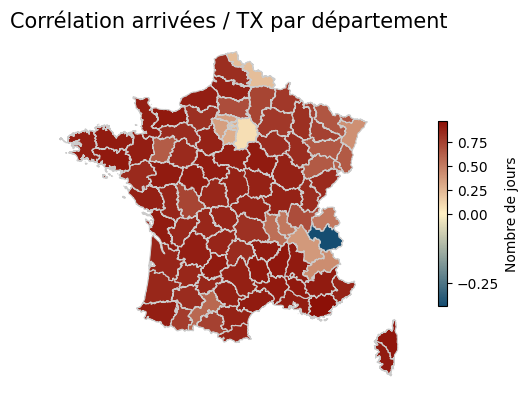

In [96]:
corr_dep = corr_par_dep.copy()
corr_dep["DEP"] = corr_dep["DEP"].astype(str).str.zfill(2)

annees = toutes_annees
mois=mois_ete
fig, ax = plt.subplots(figsize=(6, 8))

cartes.mise_en_forme_carte(
    cartes.donnee_carte(corr_dep),
    annees=toutes_annees,
    mois=mois_ete,
    indicateur= "corr_arrivees_TX", 
    titre_carte= "Corrélation arrivées / TX par département", 
    plotting=ax, 
    evolution=False
)

Nous allons créer un nouvel indicateur reliant les arrivées touristiques de l’année N à un indice de chaleur estivale décalé d’un an (N−1), afin d’intégrer l’idée que les décisions de voyage peuvent dépendre des conditions climatiques observées l’année précédente. 

Tout d'abord, nous allons construire l’indice de chaleur annuel par département.

In [97]:
import pandas as pd

# On part de df = base climat + tourisme fusionnée
df_ind = df.copy()

# Mois d'été et d'hiver
mois_ete = [6, 7, 8, 9]
mois_hiver = [12, 1, 2, 3]

# On choisit de garder d'un côté les mois été, de l'autre les mois hiver
df_ete = df_ind[df_ind["MM"].isin(mois_ete)].copy()
df_hiver = df_ind[df_ind["MM"].isin(mois_hiver)].copy()

# Indice de chaleur mensuel (pondération des jours très chauds)
df_ete["indice_chaleur_mensuel"] = (
    df_ete["NBJTX25"].fillna(0)
    + df_ete["NBJTX30"].fillna(0)
    + 2 * df_ete["NBJTX35"].fillna(0)
)

# Indice de froid mensuel (pondération des jours avec de la neige et avec un sol enneigé)
df_hiver["indice_froid_mensuel"] = (
    df_hiver["NBJTX0"].fillna(0)
    + 2 * df_hiver["NBJNEIG"].fillna(0)
    + 2 * df_hiver["NBJSOLNG"].fillna(0)
)

# Agrégation annuelle par département :
# - somme des arrivées
# - somme de l'indice de chaleur sur les mois d'été
base_ind = (
    df_ete
    .groupby(["DEP", "AAAA",], as_index=False)
    .agg(
        arrivees=("OBS_VALUE_CORR", "sum"),
        indice_chaleur=("indice_chaleur_mensuel", "sum")
    )
)

# Agrégation annuelle par département :
# - somme des arrivées
# - somme de l'indice de froid sur les mois d'hiver
base_ind_froid = (
    df_hiver
    .groupby(["DEP", "AAAA"], as_index=False)
    .agg(
        arrivees=("OBS_VALUE_CORR", "sum"),
        indice_froid=("indice_froid_mensuel", "sum")
    )
)

base_ind.head()

,DEP,AAAA,arrivees,indice_chaleur
0,01,2011,288060.0,72.750000
1,01,2012,310260.0,80.375000
2,01,2013,325860.0,81.559289
3,01,2014,337270.0,62.249012
4,01,2015,319150.0,121.833333


In [98]:
base_ind_froid.head()

,DEP,AAAA,arrivees,indice_froid
0,01,2011,208170.0,35.278856
1,01,2012,212430.0,78.594697
2,01,2013,236480.0,52.239380
3,01,2014,240960.0,42.116330
4,01,2015,247160.0,29.405212


Dans base_ind, la colonne arrivees = somme des arrivées d’été (mois 6–9).
Dans base_ind_froid, la colonne arrivees = somme des arrivées d’hiver (mois 12–3).

Maintenant, nous allons construire l'indicateur climat N-1

In [99]:
# On s'assure que les lignes sont bien triées
base_ind = base_ind.sort_values(["DEP", "AAAA"])

# Pour chaque département, on décale l'indice de chaleur d'une année
base_ind["indice_chaleur_N_1"] = (
    base_ind
    .groupby("DEP")["indice_chaleur"]
    .shift(1)     # année précédente
)

# On enlève les années où on n'a pas encore de N-1 (première année de chaque DEP)
base_lag = base_ind.dropna(subset=["indice_chaleur_N_1"]).copy()

base_lag.head()

,DEP,AAAA,arrivees,indice_chaleur,indice_chaleur_N_1
1,01,2012,310260.0,80.375000,72.750000
2,01,2013,325860.0,81.559289,80.375000
3,01,2014,337270.0,62.249012,81.559289
4,01,2015,319150.0,121.833333,62.249012
5,01,2016,330540.0,101.875000,121.833333


Nous allons faire de même pour indice froid.

In [100]:
base_ind_froid = base_ind_froid.sort_values(["DEP", "AAAA"])

base_ind_froid["indice_froid_N_1"] = (
    base_ind_froid
    .groupby("DEP")["indice_froid"]
    .shift(1)      # année précédente
)

base_lag_froid = base_ind_froid.dropna(subset=["indice_froid_N_1"]).copy()

base_lag_froid.head()

,DEP,AAAA,arrivees,indice_froid,indice_froid_N_1
1,01,2012,212430.0,78.594697,35.278856
2,01,2013,236480.0,52.239380,78.594697
3,01,2014,240960.0,42.116330,52.239380
4,01,2015,247160.0,29.405212,42.116330
5,01,2016,230810.0,34.427800,29.405212


Nous allons maintenant calculer la corrélation globale arrivées N vs indice chaleur N-1.

In [101]:
corr_global_lag = base_lag["arrivees"].corr(
    base_lag["indice_chaleur_N_1"],
    method="pearson"
)

print("Corrélation globale arrivées (année N) / indice de chaleur (année N-1) :",
      corr_global_lag)

Corrélation globale arrivées (année N) / indice de chaleur (année N-1) : -0.007356966468066218


Nous avons construit un indicateur de « chaleur estivale » en année N–1, défini comme une combinaison pondérée du nombre de jours avec des températures maximales supérieures à 25 °C, 30 °C et 35 °C, agrégé par département et par année. Nous avons ensuite calculé la corrélation entre cet indice de chaleur en année N–1 et le nombre d’arrivées touristiques en année N.

La corrélation obtenue est très faible : ρ ≈ –0,007. Une valeur aussi proche de zéro signifie qu’il n’existe pratiquement aucune relation linéaire entre la chaleur de l’été précédent et les flux touristiques observés l’année suivante, au niveau départemental. Le signe légèrement négatif n’a pas d’interprétation économique robuste : il est trop faible pour être considéré comme significatif et doit être vu comme une fluctuation aléatoire.

Ce résultat suggère que, dans nos données, les variations interannuelles des arrivées touristiques sont surtout déterminées par d’autres facteurs (conjoncture économique, coût du transport, effets exceptionnels comme la crise Covid, etc.), et que le niveau de chaleur de l’été précédent ne permet pas, à lui seul, d’expliquer les variations des flux touristiques départementaux.

Nous allons maintenant calculer la corrélation globale arrivées N vs indice froid N-1.

In [102]:
corr_global_lag_froid = base_lag_froid["arrivees"].corr(
    base_lag_froid["indice_froid_N_1"],
    method="pearson"
)

print("Corrélation globale arrivées (année N) / indice de froid (année N-1) :",
      corr_global_lag_froid)

Corrélation globale arrivées (année N) / indice de froid (année N-1) : -0.012817768954158293


In [103]:
# Par département pour indice chaleur

corr_par_dep_lag = (
    base_lag
    .groupby("DEP")
    .apply(lambda g: g["arrivees"].corr(g["indice_chaleur_N_1"], method="pearson"))
    .reset_index(name="corr_arrivees_indice_N_1")
)

corr_par_dep_lag.head()

dep_corr_forte_positive = corr_par_dep_lag[corr_par_dep_lag["corr_arrivees_indice_N_1"] >= 0.75]
liste_dep_forte_negative= corr_par_dep_lag.loc[corr_par_dep_lag["corr_arrivees_indice_N_1"] <= -0.5, "DEP"].tolist()
dep_corr_forte_negative = corr_par_dep_lag[corr_par_dep_lag["corr_arrivees_indice_N_1"] <= -0.5]

print("Départements à corrélation fortement POSITIVE :")
print(dep_corr_forte_positive)

print("\nDépartements à corrélation fortement NÉGATIVE :")
print(dep_corr_forte_negative)
print(liste_dep_forte_negative)


Départements à corrélation fortement POSITIVE :
Empty DataFrame
Columns: [DEP, corr_arrivees_indice_N_1]
Index: []

Départements à corrélation fortement NÉGATIVE :
   DEP  corr_arrivees_indice_N_1
10  11                 -0.552799
13  14                 -0.535390
18  19                 -0.501510
19  21                 -0.576011
21  23                 -0.599320
22  24                 -0.566927
30  30                 -0.602858
31  31                 -0.566711
36  36                 -0.543776
37  37                 -0.534843
39  39                 -0.611635
42  42                 -0.581539
48  48                 -0.591619
51  51                 -0.574837
52  52                 -0.711900
54  54                 -0.580609
58  58                 -0.530432
60  60                 -0.563600
61  61                 -0.619835
62  62                 -0.592470
80  80                 -0.617430
84  84                 -0.622068
86  86                 -0.547042
89  89                 -0.520799
91  91     

In [104]:
# Par département pour indice froid 

corr_par_dep_lag_froid = (
    base_lag_froid
    .groupby("DEP")
    .apply(lambda g: g["arrivees"].corr(g["indice_froid_N_1"], method="pearson"))
    .reset_index(name="corr_froid_arrivees_indice_N_1")
)

corr_par_dep_lag_froid.head()

dep_corr_froid_forte_positive = corr_par_dep_lag_froid[corr_par_dep_lag_froid["corr_froid_arrivees_indice_N_1"] >= 0.75]
liste_froid_dep_forte_negative= corr_par_dep_lag_froid.loc[corr_par_dep_lag_froid["corr_froid_arrivees_indice_N_1"] <= -0.5, "DEP"].tolist()
dep_corr_froid_forte_negative = corr_par_dep_lag_froid[corr_par_dep_lag_froid["corr_froid_arrivees_indice_N_1"] <= -0.5]

print("Départements à corrélation fortement POSITIVE - indice froid :")
print(dep_corr_froid_forte_positive)

print("\nDépartements à corrélation fortement NÉGATIVE - indice froid:")
print(dep_corr_froid_forte_negative)
print(liste_froid_dep_forte_negative)

Départements à corrélation fortement POSITIVE - indice froid :
Empty DataFrame
Columns: [DEP, corr_froid_arrivees_indice_N_1]
Index: []

Départements à corrélation fortement NÉGATIVE - indice froid:
Empty DataFrame
Columns: [DEP, corr_froid_arrivees_indice_N_1]
Index: []
[]


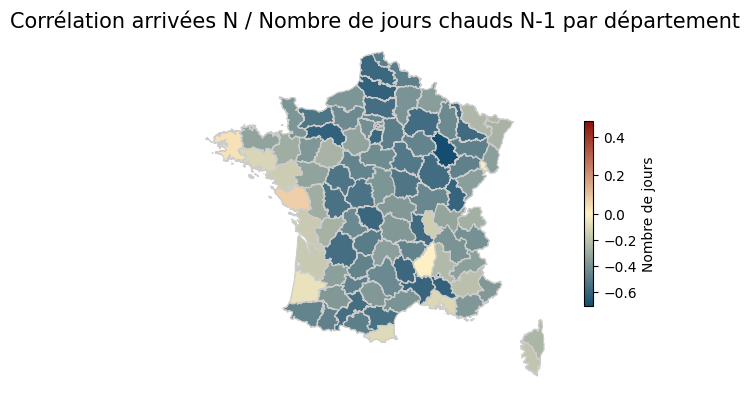

In [105]:
corr_dep2 = corr_par_dep_lag.copy()
corr_dep2["DEP"] = corr_dep2["DEP"].astype(str).str.zfill(2)

annees = toutes_annees
mois=mois_ete
fig, ax = plt.subplots(figsize=(6, 8))

cartes.mise_en_forme_carte(
    cartes.donnee_carte(corr_dep2),
    annees=toutes_annees,
    mois=mois_ete,
    indicateur= "corr_arrivees_indice_N_1", 
    titre_carte= "Corrélation arrivées N / Nombre de jours chauds N-1 par département", 
    plotting=ax, 
    evolution=False
)

La légende utilise une échelle centrée sur 0 :

- en bleu, les corrélations négatives (dans ces départements, les années précédées d’un été plus chaud tendent plutôt à être associées à des niveaux d’arrivées légèrement plus faibles) ;
- en rouge, les corrélations positives (les années précédées d’un été plus chaud sont associées à des arrivées un peu plus élevées) ;
- les tons beige / gris clair correspondants à des corrélations proches de 0, c’est-à-dire pas de lien linéaire marqué.

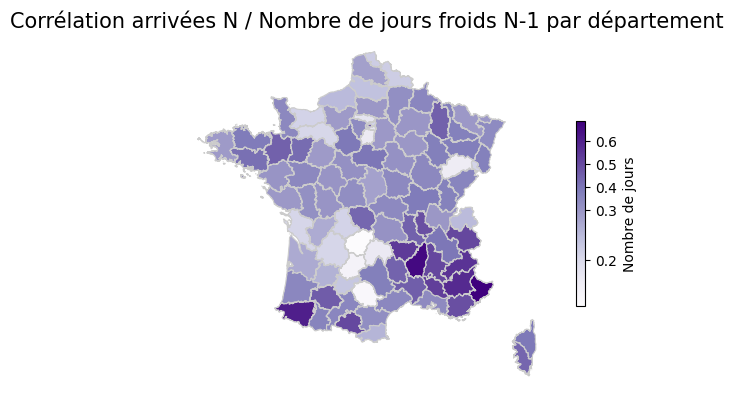

In [106]:
corr_dep3 = corr_par_dep_lag_froid.copy()
corr_dep3["DEP"] = corr_dep3["DEP"].astype(str).str.zfill(2)

annees = toutes_annees
mois=mois_hiver
fig, ax = plt.subplots(figsize=(6, 8))

cartes.mise_en_forme_carte(
    cartes.donnee_carte(corr_dep3),
    annees=toutes_annees,
    mois=mois_hiver,
    indicateur= "corr_froid_arrivees_indice_N_1", 
    titre_carte= "Corrélation arrivées N / Nombre de jours froids N-1 par département", 
    plotting=ax, 
    evolution=False
)

#### 2.3.2. Corrélation climat - nombre d'arrivées selon l'origine des touristes <a id="section_2_3_1"></a>

Nous trouvons que c'est également intéressant de prendre en compte l'origine des touristes dans nos indices de corrélation. Tout d'abord, nous voulons observer la part des touristes internationaux dans le total des arrivées. 

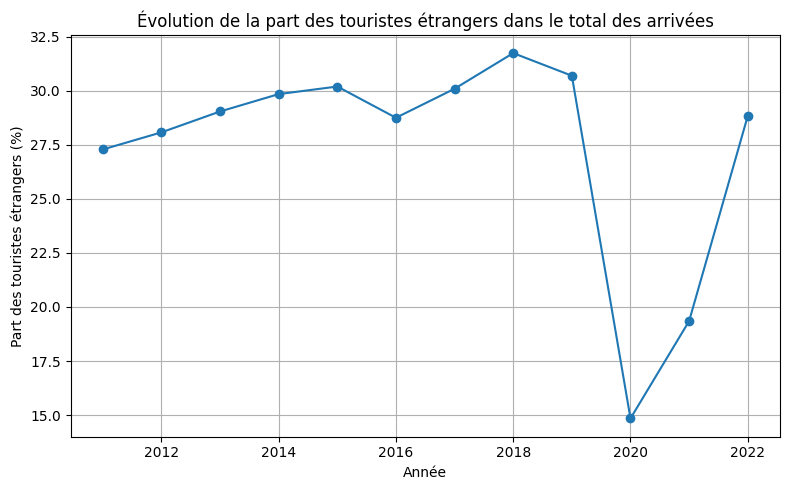

In [73]:
tour = data_3.copy()

# 1. On agrège par année et origine du touriste
agg = (
    tour
    .groupby(["AAAA", "TOUR_RESID"], as_index=False)["OBS_VALUE_CORR"]
    .sum()
)

# 2. On met France / Étranger en colonnes
pivot = agg.pivot(index="AAAA", columns="TOUR_RESID", values="OBS_VALUE_CORR")

# Sécuriser les noms de colonnes (accents ou pas selon ta base)
pivot = pivot.rename(columns={
    "Étranger": "etranger",
    "France": "france"
})

# 3. Part des étrangers dans le total par année
pivot["part_etrangers"] = pivot["etranger"] / (pivot["etranger"] + pivot["france"])

# 4. Tracé de la courbe
plt.figure(figsize=(8, 5))
plt.plot(pivot.index, 100 * pivot["part_etrangers"], marker="o")
plt.xlabel("Année")
plt.ylabel("Part des touristes étrangers (%)")
plt.title("Évolution de la part des touristes étrangers dans le total des arrivées")
plt.grid(True)
plt.tight_layout()
plt.show()

Nous observons que la part des touristes internationaux en France métropolitaine varie entre 27% et 32% entre 2011 et 2019, avec une tendance globalement haussière, à l’exception de 2016 et 2019. 
Nous pouvons également observer l'effet du Covid19 sur les flux touristiques internationaux. En effet, une forte baisse est visible : les touristes internationaux représentent moins de 15% des arrivées. On observe ensuite un rebond, avec une part qui remonte à 19 % en 2021, puis 28,5 % en 2022.
Globalement, la part des touristes internationaux est donc orientée à la hausse, hors événements majeurs perturbant la mobilité internationale.
Dans la suite, nous cherchons à mesurer dans quelle mesure le réchauffement climatique influence les déplacements touristiques internationaux en France métropolitaine. Nous excluons, ainsi, les années 2020 et 2021, dont les flux sont fortement perturbés par la crise sanitaire et donc peu représentatifs de la dynamique climatique.

Nous avons remarqué que lorsque l'on prend l'origine des touristes en compte, les lignes se dédoublent. Ainsi pour ne pas impacter les programmes précédents, nous allons créer une nouvelle base de données en prenant en compte data_3 à la place de data_2.

In [74]:
# data_1 : climat (DEP, AAAA, MM, NBJTX25, NBJTX30, NBJ35, NBJTX0, NBJNEIG, NBJSOLNG, etc.)
# data_3 : tourisme avec origine (DEP, AAAA, MM, TOUR_RESID, OBS_VALUE_CORR, ...)

dl = data_1.merge(
    data_3,
    on=["DEP", "AAAA", "MM"],
    how="left")

In [107]:
dl_ind = dl.copy()

# On enlève 2020 et 2021
dl_ind = dl_ind[~dl_ind["AAAA"].isin([2020, 2021])]

dl_ete = dl_ind[dl_ind["MM"].isin(mois_ete)].copy()
dl_hiver = dl_ind[dl_ind["MM"].isin(mois_hiver)].copy()

# Indice de chaleur mensuel
dl_ete["indice_chaleur_mensuel"] = (
    dl_ete["NBJTX25"].fillna(0)
    + dl_ete["NBJTX30"].fillna(0)
    + 2 * dl_ete["NBJTX35"].fillna(0)
)

# Indice de froid mensuel
dl_hiver["indice_froid_mensuel"] = (
    dl_hiver["NBJTX0"].fillna(0)
    + 2 * dl_hiver["NBJNEIG"].fillna(0)
    + 2 * dl_hiver["NBJSOLNG"].fillna(0)
)

# Été : agrégation annuelle par DEP, AAAA, origine
base_ind2 = (
    dl_ete
    .groupby(["DEP", "AAAA", "TOUR_RESID"], as_index=False)
    .agg(
        arrivees=("OBS_VALUE_CORR", "sum"),
        indice_chaleur=("indice_chaleur_mensuel", "sum")
    )
)

# Hiver : agrégation annuelle par DEP, AAAA, origine
base_ind_froid2 = (
    dl_hiver
    .groupby(["DEP", "AAAA", "TOUR_RESID"], as_index=False)
    .agg(
        arrivees=("OBS_VALUE_CORR", "sum"),
        indice_froid=("indice_froid_mensuel", "sum")
    )
)

base_ind2.head()

,DEP,AAAA,TOUR_RESID,arrivees,indice_chaleur
0,01,2011,France,204650.0,72.750000
1,01,2011,Étranger,83410.0,72.750000
2,01,2012,France,232450.0,80.375000
3,01,2012,Étranger,77810.0,80.375000
4,01,2013,France,242350.0,81.559289


In [108]:
base_ind_froid2.head()

,DEP,AAAA,TOUR_RESID,arrivees,indice_froid
0,01,2011,France,169010.0,35.278856
1,01,2011,Étranger,39160.0,35.278856
2,01,2012,France,170660.0,78.594697
3,01,2012,Étranger,41800.0,78.594697
4,01,2013,France,188410.0,52.239380


In [128]:
# On s'assure que c’est trié
base_ind2 = base_ind2.sort_values(["DEP", "TOUR_RESID", "AAAA"])

# Création de l'indice de chaleur de l'année N-1 par DEP + origine
base_ind2["indice_chaleur_N_1"] = (
    base_ind2
    .groupby(["DEP", "TOUR_RESID"])["indice_chaleur"]
    .shift(1)   # année précédente
)

# On enlève les lignes sans N-1 (première année de chaque série)
base_lag_chaleur2 = base_ind2.dropna(subset=["indice_chaleur_N_1"]).copy()

# On garde uniquement les Touristes internationaux 
etranger_chaleur2 = base_lag_chaleur2[base_lag_chaleur2["TOUR_RESID"] == "Étranger"].copy()

# Corrélation globale (tous départements, toutes années)
corr_etranger_chaleur_globale2 = etranger_chaleur2["arrivees"].corr(
    etranger_chaleur2["indice_chaleur_N_1"],
    method="pearson"
)

print("Corrélation globale (Touristes internationaux année N vs indice chaleur année N-1) :", corr_etranger_chaleur_globale2)

# si on regarde la corrélation globale pour les Français
# On garde uniquement les Français
français_chaleur2 = base_lag_chaleur2[base_lag_chaleur2["TOUR_RESID"] == "France"].copy()

# Corrélation globale
corr_français_chaleur_globale2 = français_chaleur2["arrivees"].corr(
    français_chaleur2["indice_chaleur_N_1"],
    method="pearson"
)

print("Corrélation globale (Touristes français année N vs indice chaleur année N-1) :", corr_français_chaleur_globale2)


# Corrélation par département
corr_etranger_chaleur_dep2 = (
    etranger_chaleur2
    .groupby("DEP")
    .apply(lambda g: g["arrivees"].corr(g["indice_chaleur_N_1"], method="pearson"))
    .reset_index(name="corr_arrivees_indice_chaleur_N_1")
)

print("\nCorrélation par département (Touristes internationaux  année N vs indice chaleur année N-1) :")
print(corr_etranger_chaleur_dep2)

Corrélation globale (Touristes internationaux année N vs indice chaleur année N-1) : -0.02335301663580819
Corrélation globale (Touristes français année N vs indice chaleur année N-1) : 0.05174374162071084

Corrélation par département (Touristes internationaux  année N vs indice chaleur année N-1) :
   DEP  corr_arrivees_indice_chaleur_N_1
0   01                          0.265553
1   02                         -0.091116
2   03                         -0.072594
3   04                         -0.373635
4   05                          0.600053
..  ..                               ...
91  91                         -0.439563
92  92                          0.567485
93  93                          0.436741
94  94                          0.085729
95  95                         -0.316909

[96 rows x 2 columns]


In [129]:
# Tri
base_ind_froid2 = base_ind_froid2.sort_values(["DEP", "TOUR_RESID", "AAAA"])

# Indice de froid de l'année N-1
base_ind_froid2["indice_froid_N_1"] = (
    base_ind_froid2
    .groupby(["DEP", "TOUR_RESID"])["indice_froid"]
    .shift(1)
)

# On enlève les lignes sans N-1
base_lag_froid2 = base_ind_froid2.dropna(subset=["indice_froid_N_1"]).copy()

# On garde uniquement les Touristes internationaux 
etranger_froid = base_lag_froid2[base_lag_froid2["TOUR_RESID"] == "Étranger"].copy()

# Corrélation globale
corr_etranger_froid_globale = etranger_froid["arrivees"].corr(
    etranger_froid["indice_froid_N_1"],
    method="pearson"
)

print("Corrélation globale (Touristes internationaux année N vs indice froid année N-1) :", corr_etranger_froid_globale)

# si on regarde la corrélation globale pour les Français
# On garde uniquement les Français
francais_froid = base_lag_froid2[base_lag_froid2["TOUR_RESID"] == "France"].copy()

# Corrélation globale
corr_francais_froid_globale = francais_froid["arrivees"].corr(
    francais_froid["indice_froid_N_1"],
    method="pearson"
)

print("Corrélation globale (Touristes français année N vs indice froid année N-1) :", corr_francais_froid_globale)

# Corrélation par département
corr_etranger_froid_dep = (
    etranger_froid
    .groupby("DEP")
    .apply(lambda g: g["arrivees"].corr(g["indice_froid_N_1"], method="pearson"))
    .reset_index(name="corr_arrivees_indice_froid_N_1")
)

print("\nCorrélation par département (Touristes internationaux année N vs indice froid année N-1) :")
print(corr_etranger_froid_dep)



Corrélation globale (Touristes internationaux année N vs indice froid année N-1) : -0.03701130646808346
Corrélation globale (Touristes français année N vs indice froid année N-1) : -0.06870367536024577

Corrélation par département (Touristes internationaux année N vs indice froid année N-1) :
   DEP  corr_arrivees_indice_froid_N_1
0   01                        0.262705
1   02                       -0.127711
2   03                       -0.278934
3   04                       -0.211048
4   05                       -0.084610
..  ..                             ...
91  91                        0.261227
92  92                        0.220519
93  93                        0.252988
94  94                        0.054285
95  95                        0.164717

[96 rows x 2 columns]


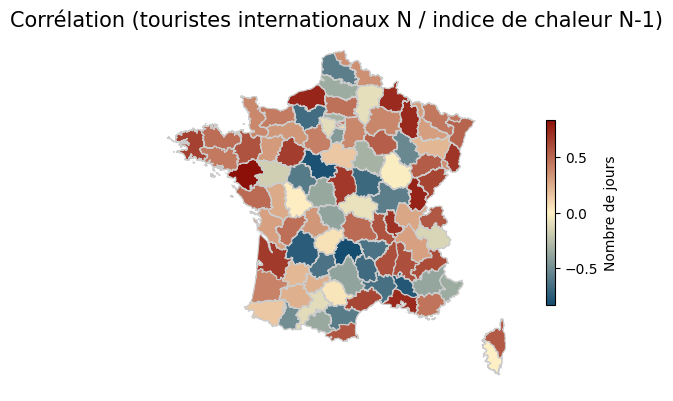

In [131]:
# Copie + formatage du code département
corr_etranger_chaleur_map = corr_etranger_chaleur_dep2.copy()
corr_etranger_chaleur_map["DEP"] = (
    corr_etranger_chaleur_map["DEP"]
    .astype(str)
    .str.zfill(2)
)

fig, ax = plt.subplots(figsize=(6, 8))

cartes.mise_en_forme_carte(
    cartes.donnee_carte(corr_etranger_chaleur_map),
    annees=toutes_annees,
    mois=mois_ete,   # été, puisque c’est l’indice de chaleur
    indicateur="corr_arrivees_indice_chaleur_N_1",
    titre_carte="Corrélation (touristes internationaux N / indice de chaleur N-1)",
    plotting=ax,
    evolution=False
)

plt.show()

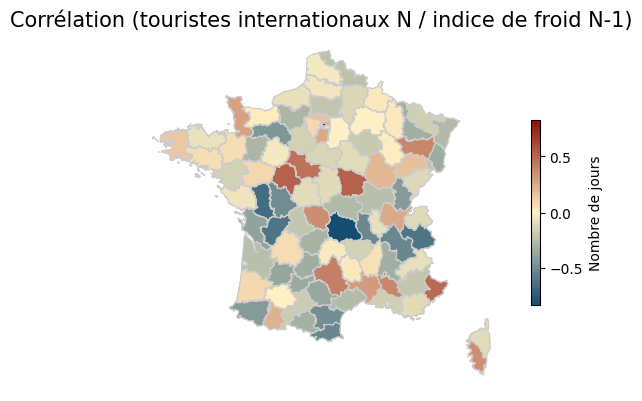

In [132]:
# Copie + formatage du code département
corr_etranger_froid_map = corr_etranger_froid_dep.copy()
corr_etranger_froid_map["DEP"] = (
    corr_etranger_froid_map["DEP"]
    .astype(str)
    .str.zfill(2)
)

fig, ax = plt.subplots(figsize=(6, 8))

cartes.mise_en_forme_carte(
    cartes.donnee_carte(corr_etranger_froid_map),
    annees=toutes_annees,
    mois=mois_hiver,   # hiver, pour l’indice de froid
    indicateur="corr_arrivees_indice_froid_N_1",
    titre_carte="Corrélation (touristes internationaux N / indice de froid N-1)",
    plotting=ax,
    evolution=False
)

plt.show()

## 3. Modélisation <a id="chapter_3"></a>
### 3.1. Présentation du modèle <a id="section_3_1"></a>


A COMPLETER

### 3.2. Présentation du modèle <a id="section_3_2"></a>


DÉPARTEMENT : Allier

#1) Préparation des données
DÉPARTEMENT 03
2011 : mois observés → [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2012 : mois observés → [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2013 : mois observés → [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2014 : mois observés → [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2015 : mois observés → [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2016 : mois observés → [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2017 : mois observés → [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2018 : mois observés → [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2019 : mois observés → [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2020 : mois observés → [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2021 : mois observés → [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2022 : mois observés → [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

NOTE MÉTHODOLOGIQUE
- Données postérieures à 2020 exclues (crise sanitaire)
- Mois manquants interpolés par méthode temporelle
- Flux touristique transformé en logarithme

#2) An

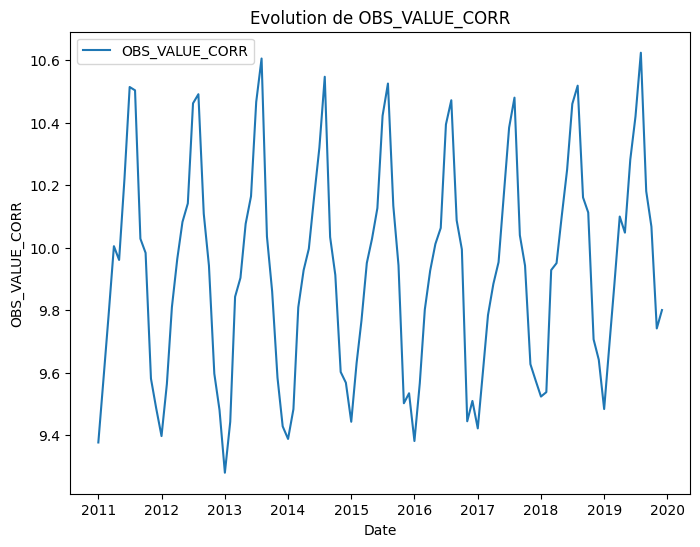

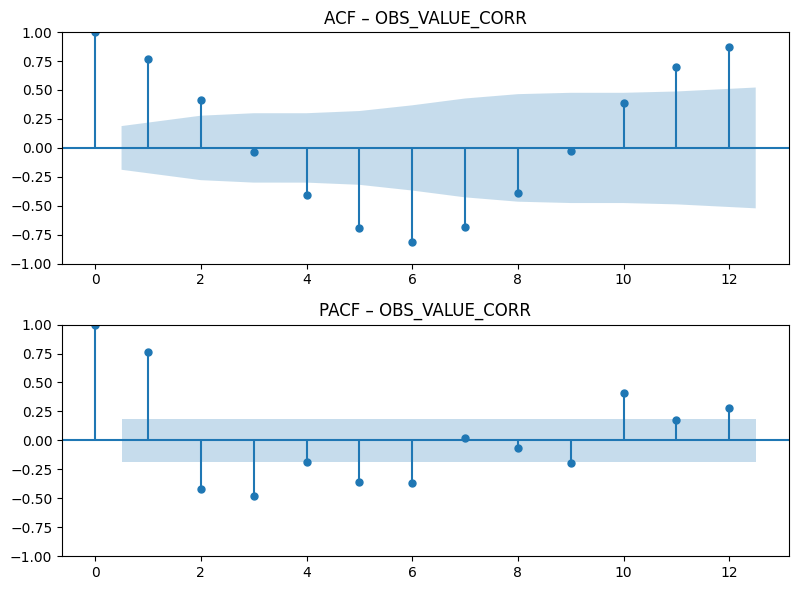

TEST DE SAISONNALITÉ DÉTERMINISTE
                            OLS Regression Results                            
Dep. Variable:         OBS_VALUE_CORR   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sun, 28 Dec 2025   Prob (F-statistic):           4.76e-66
Time:                        16:19:27   Log-Likelihood:                 138.54
No. Observations:                 108   AIC:                            -253.1
Df Residuals:                      96   BIC:                            -220.9
Df Model:                          11                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept 

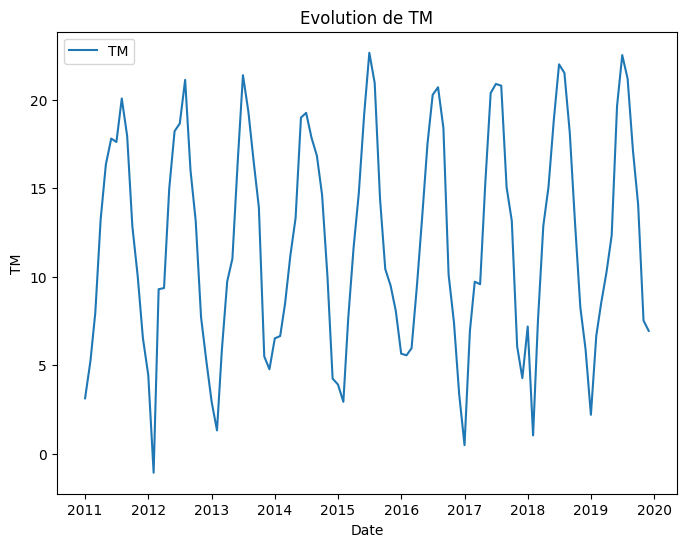

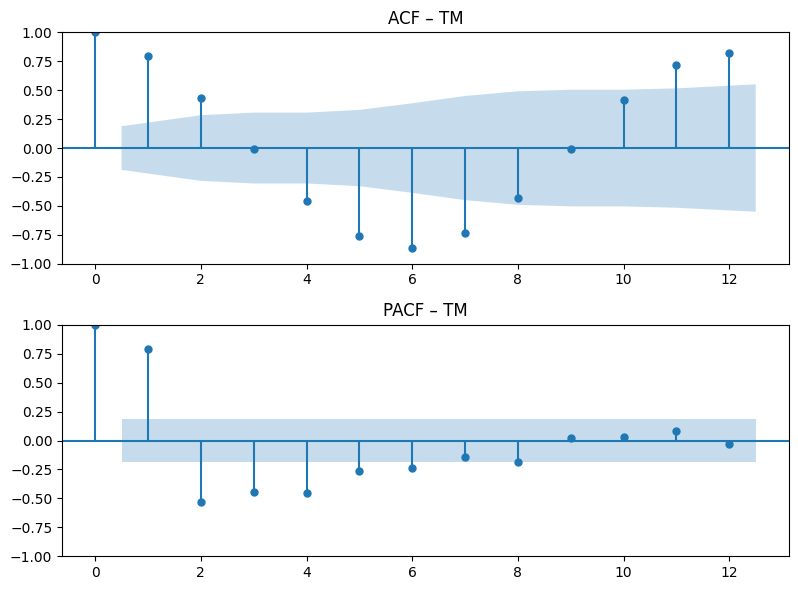

TEST DE SAISONNALITÉ DÉTERMINISTE
                            OLS Regression Results                            
Dep. Variable:                     TM   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     136.6
Date:                Sun, 28 Dec 2025   Prob (F-statistic):           1.58e-53
Time:                        16:19:28   Log-Likelihood:                -204.85
No. Observations:                 108   AIC:                             433.7
Df Residuals:                      96   BIC:                             465.9
Df Model:                          11                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept 

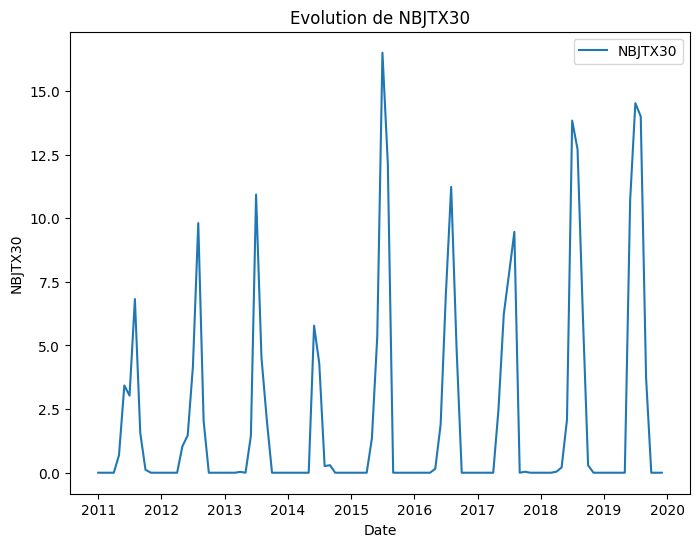

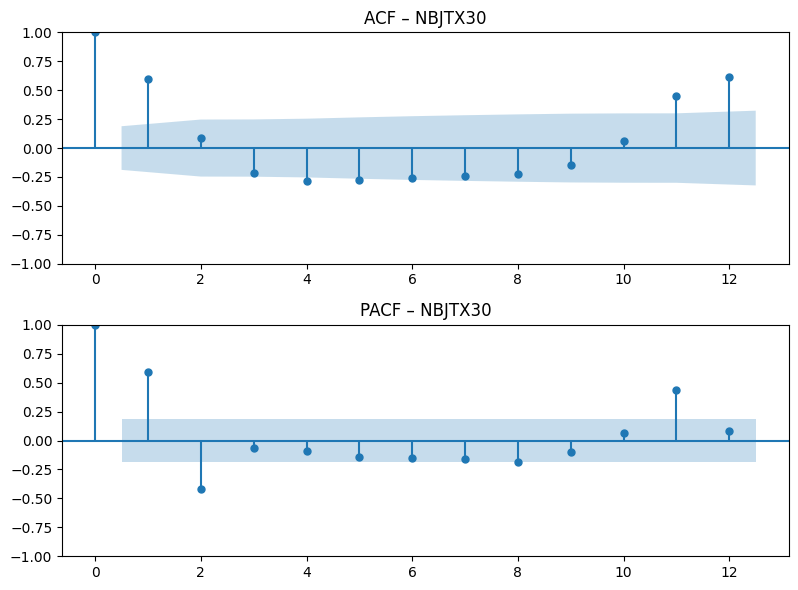

TEST DE SAISONNALITÉ DÉTERMINISTE
                            OLS Regression Results                            
Dep. Variable:                NBJTX30   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     14.92
Date:                Sun, 28 Dec 2025   Prob (F-statistic):           4.85e-13
Time:                        16:19:28   Log-Likelihood:                -233.39
No. Observations:                 108   AIC:                             490.8
Df Residuals:                      96   BIC:                             523.0
Df Model:                          11                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept 

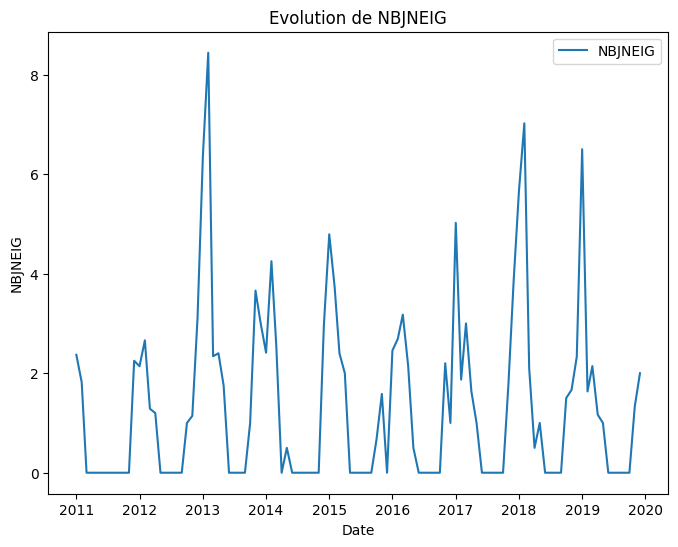

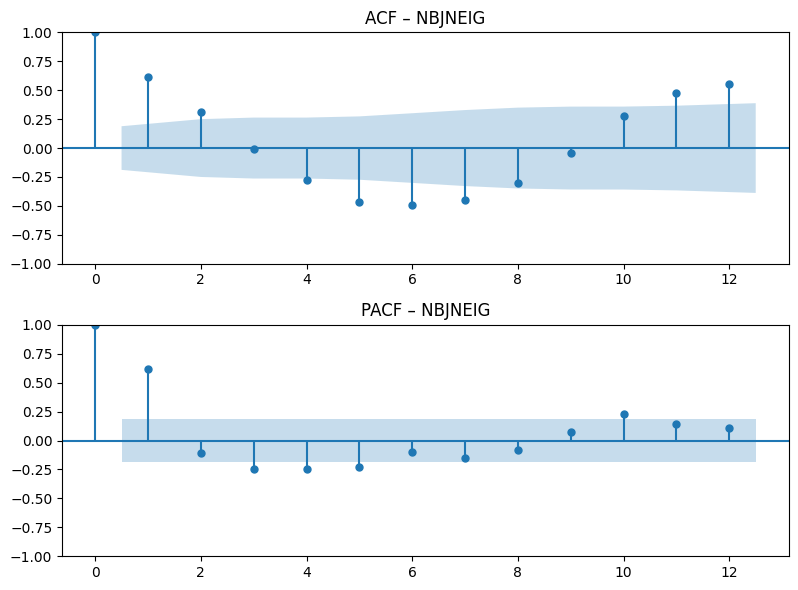

TEST DE SAISONNALITÉ DÉTERMINISTE
                            OLS Regression Results                            
Dep. Variable:                NBJNEIG   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     24.32
Date:                Sun, 28 Dec 2025   Prob (F-statistic):           5.26e-20
Time:                        16:19:28   Log-Likelihood:                -156.38
No. Observations:                 108   AIC:                             336.8
Df Residuals:                      96   BIC:                             368.9
Df Model:                          11                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept 

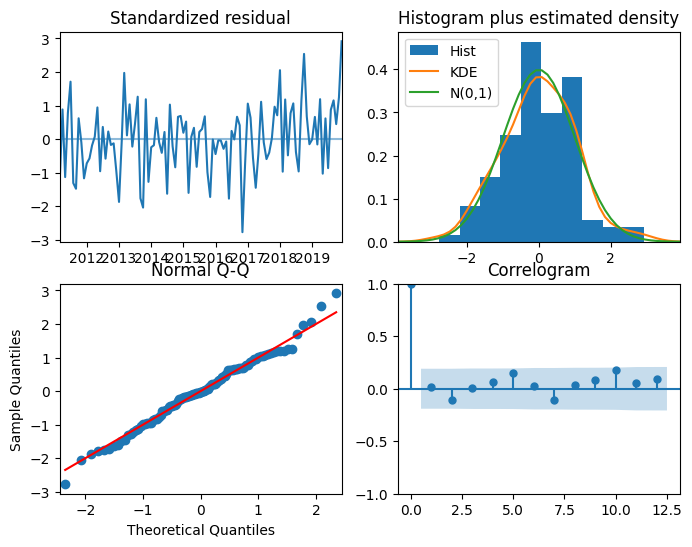

Rélation de long terme Analyse
                                UECM Model Results                                
Dep. Variable:           D.OBS_VALUE_CORR   No. Observations:                  108
Model:             Seas. UECM(2, 1, 1, 1)   Log Likelihood                 157.095
Method:                   Conditional MLE   S.D. of innovations              9.941
Date:                    Sun, 28 Dec 2025   AIC                           -278.190
Time:                            16:19:32   BIC                           -230.248
Sample:                        03-01-2011   HQIC                          -258.759
                             - 12-01-2019                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6215      1.089      2.407      0.018       0.457       4.786
s(2,12)                 0.1924      0.034

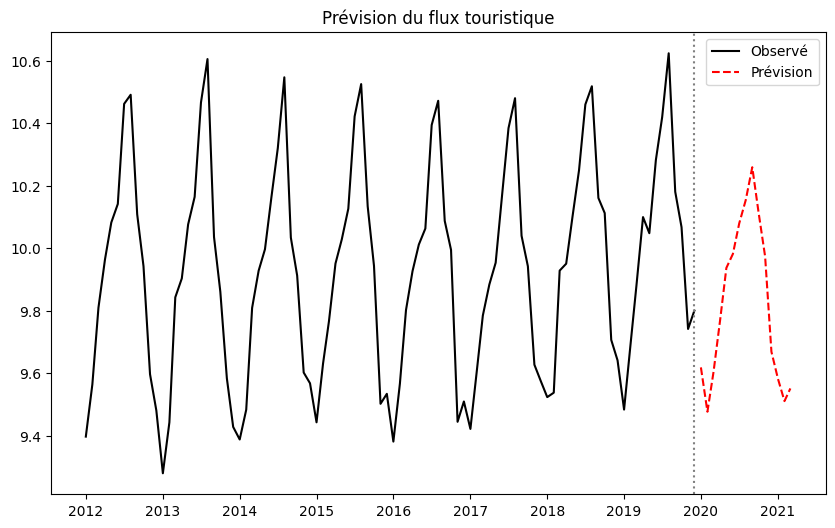

(3,
 'Allier',
 {2011: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  2012: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  2013: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  2014: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  2015: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  2016: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  2017: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  2018: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  2019: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  2020: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  2021: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  2022: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
 np.int64(0),
 ('Série corrigée de la saisonnalité déterministe', 1),
 ('Série corrigée de la saisonnalité déterministe', 0),
 ('Série corrigée de la saisonnalité déterministe', 0),
 ('Série corrigée de la saisonnalité déterministe', 0),
 'Il existe une relation de long terme entre le climat et les flux touristiques. Le changement climatique influence structurellement l’attractivité touristiqu

In [75]:
from src.package_project.Test import Test, Resultat
Test(3)

DÉPARTEMENT : Aveyron

#1) Préparation des données
DÉPARTEMENT 12
2011 : mois observés → [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2012 : mois observés → [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2013 : mois observés → [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2014 : mois observés → [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2015 : mois observés → [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2016 : mois observés → [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2017 : mois observés → [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2018 : mois observés → [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2019 : mois observés → [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2020 : mois observés → [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2021 : mois observés → [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2022 : mois observés → [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

NOTE MÉTHODOLOGIQUE
- Données postérieures à 2020 exclues (crise sanitaire)
- Mois manquants interpolés par méthode temporelle
- Flux touristique transformé en logarithme

#2) A

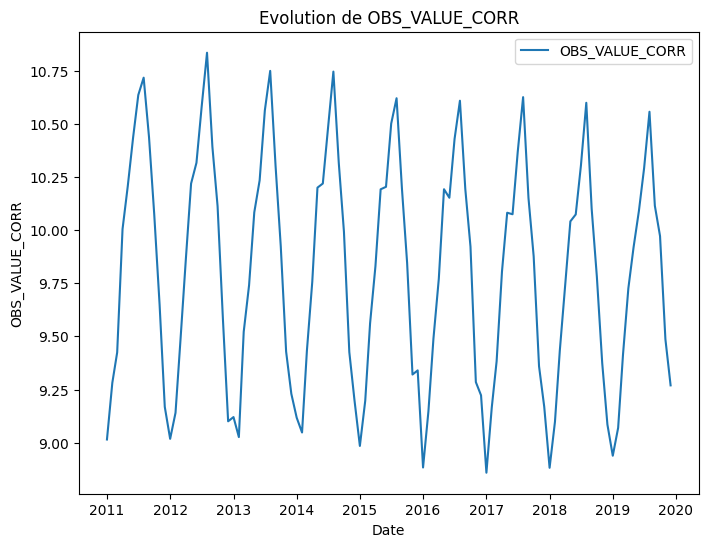

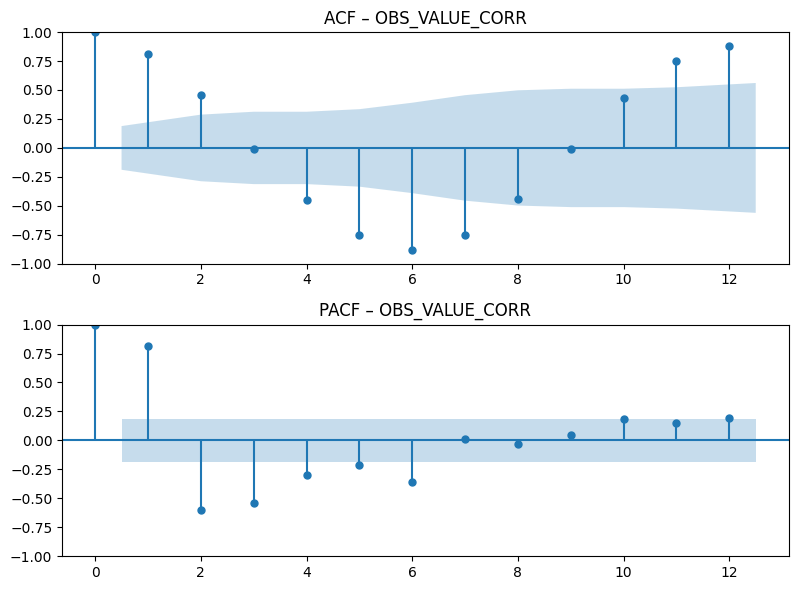

TEST DE SAISONNALITÉ DÉTERMINISTE
                            OLS Regression Results                            
Dep. Variable:         OBS_VALUE_CORR   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     309.9
Date:                Sun, 28 Dec 2025   Prob (F-statistic):           8.12e-70
Time:                        16:20:51   Log-Likelihood:                 100.75
No. Observations:                 108   AIC:                            -177.5
Df Residuals:                      96   BIC:                            -145.3
Df Model:                          11                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept 

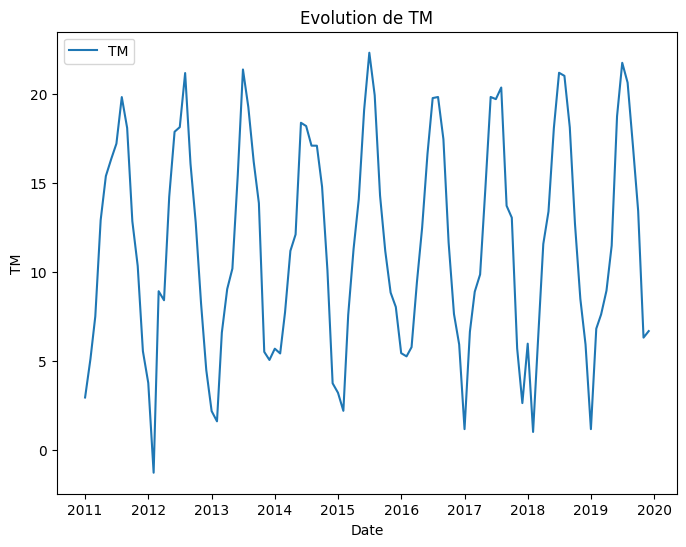

KeyboardInterrupt: 

In [76]:
#cette cellule prend plus de 10 minutes 
t0 = time.perf_counter()
dataset = Resultat(95)
clear_output(wait=True)
t1 = time.perf_counter()
print(f"Temps d'execution : {t1 - t0:.3f}s")

In [ ]:
import pandas as pd
dataset.to_csv("dataset.csv")
dataset.head()

,departement,nom_dep,donne_pres,qualite,OBS_VALUE_CORR,TM,NBJTX30,NBJNEIG,conclusion,code
0,1.0,Ain,"{2011: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]...",0.0,(Série corrigée de la saisonnalité déterminist...,(Série corrigée de la saisonnalité déterminist...,(Série corrigée de la saisonnalité déterminist...,(Série corrigée de la saisonnalité déterminist...,Il existe une relation de long terme entre le ...,bon
1,2.0,Aisne,"{2011: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]...",0.0,(Série corrigée de la saisonnalité déterminist...,(Série corrigée de la saisonnalité déterminist...,(Série corrigée de la saisonnalité déterminist...,(Série corrigée de la saisonnalité déterminist...,Les résultats sont ambigus. La relation de lon...,incertain
2,3.0,Allier,"{2011: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]...",0.0,(Série corrigée de la saisonnalité déterminist...,(Série corrigée de la saisonnalité déterminist...,(Série corrigée de la saisonnalité déterminist...,(Série corrigée de la saisonnalité déterminist...,Il existe une relation de long terme entre le ...,bon
3,4.0,Alpes-de-Haute-Provence,"{2011: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]...",0.0,(Série corrigée de la saisonnalité déterminist...,(Série corrigée de la saisonnalité déterminist...,(Série corrigée de la saisonnalité déterminist...,(Série corrigée de la saisonnalité déterminist...,Les variables climatiques ne présentent pas d’...,mauvais
4,5.0,Hautes-Alpes,"{2011: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]...",0.0,(Série corrigée de la saisonnalité déterminist...,(Série corrigée de la saisonnalité déterminist...,(Série corrigée de la saisonnalité déterminist...,(Série corrigée de la saisonnalité déterminist...,Il existe une relation de long terme entre le ...,bon


In [ ]:
dataset.code.value_counts()

code
mauvais      58
bon          30
incertain     3
Name: count, dtype: int64

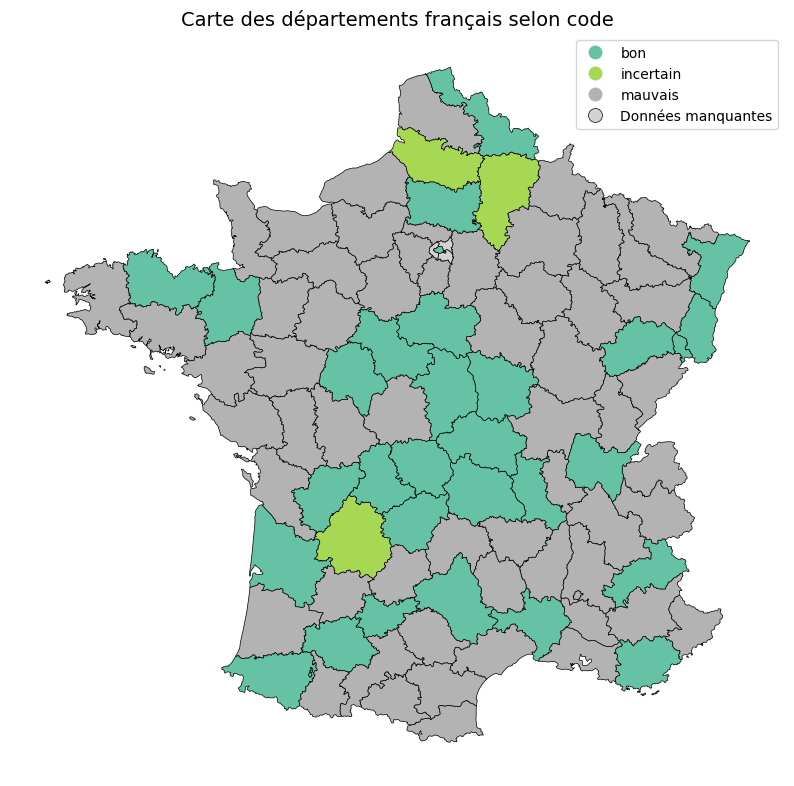

In [ ]:
dataset = pd.read_csv("dataset.csv")
from src.package_project.Carte_dyn import carte_departements
carte_departements(dataset)